In [13]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [14]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

In [15]:
application_counts = application_df["APPLICATION_TYPE"].value_counts()

In [16]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts<500].index)
replace_application
# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] =application_df["APPLICATION_TYPE"].replace(app,"Other")    

In [17]:
classification_counts = application_df["CLASSIFICATION"].value_counts()

In [18]:
replace_class = list(classification_counts[classification_counts<2000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

In [19]:
apps = list(application_df.dtypes[application_df.dtypes =="object"].index)

In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[apps]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(apps)

In [21]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index =True, right_index=True)
application_df = application_df.drop(labels=apps, axis=1)

In [22]:
# Split or preprocessed data inot our features and tarte arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1,1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

#Split the preprocessed data into a traiing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
hidden_nodes_layer1= 80
nn = tf.keras.models.Sequential()
hidden_nodes_layer2 = 30

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
# Increasing number of epochs to 300
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

- 0s 401us/step - loss: 0.5374 - accuracy: 0.7376
Epoch 111/300
804/804 [==============================] - 0s 412us/step - loss: 0.5407 - accuracy: 0.7366
Epoch 112/300
804/804 [==============================] - 0s 396us/step - loss: 0.5419 - accuracy: 0.7347
Epoch 113/300
804/804 [==============================] - 0s 397us/step - loss: 0.5476 - accuracy: 0.7298
Epoch 114/300
804/804 [==============================] - 0s 398us/step - loss: 0.5401 - accuracy: 0.7379
Epoch 115/300
804/804 [==============================] - 0s 394us/step - loss: 0.5395 - accuracy: 0.7358
Epoch 116/300
804/804 [==============================] - 0s 396us/step - loss: 0.5444 - accuracy: 0.7315
Epoch 117/300
804/804 [==============================] - 0s 404us/step - loss: 0.5473 - accuracy: 0.7326
Epoch 118/300
804/804 [==============================] - 0s 395us/step - loss: 0.5397 - accuracy: 0.7364
Epoch 119/300
804/804 [==============================] - 0s 393us/step - loss: 0.5372 - accuracy: 0.7375
Epoch

In [27]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5692 - accuracy: 0.7377
Loss: 0.5692165493965149, Accuracy: 0.7377259731292725


Increase the number of hidden nodes.

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
hidden_nodes_layer1= 90
nn = tf.keras.models.Sequential()
hidden_nodes_layer2 = 40

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 90)                3780      
_________________________________________________________________
dense_7 (Dense)              (None, 40)                3640      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 41        
Total params: 7,461
Trainable params: 7,461
Non-trainable params: 0
_________________________________________________________________


In [29]:
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 410us/step - loss: 0.5916 - accuracy: 0.7096
Epoch 2/100
804/804 [==============================] - 0s 390us/step - loss: 0.5613 - accuracy: 0.7268
Epoch 3/100
804/804 [==============================] - 0s 394us/step - loss: 0.5588 - accuracy: 0.7275
Epoch 4/100
804/804 [==============================] - 0s 396us/step - loss: 0.5580 - accuracy: 0.7266
Epoch 5/100
804/804 [==============================] - 0s 385us/step - loss: 0.5549 - accuracy: 0.7284
Epoch 6/100
804/804 [==============================] - 0s 386us/step - loss: 0.5604 - accuracy: 0.7248
Epoch 7/100
804/804 [==============================] - 0s 398us/step - loss: 0.5561 - accuracy: 0.7274
Epoch 8/100
804/804 [==============================] - 0s 386us/step - loss: 0.5516 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 0s 387us/step - loss: 0.5583 - accuracy: 0.7243
Epoch 10/100
804/804 [==============================] - 0s 388us/step - l

In [31]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5575 - accuracy: 0.7395
Loss: 0.5574780106544495, Accuracy: 0.7394751906394958


Combining both modifications

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
hidden_nodes_layer1= 90
nn = tf.keras.models.Sequential()
hidden_nodes_layer2 = 40

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 90)                3780      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                3640      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 7,461
Trainable params: 7,461
Non-trainable params: 0
_________________________________________________________________


In [33]:
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

- 0s 441us/step - loss: 0.5429 - accuracy: 0.7327
Epoch 111/300
804/804 [==============================] - 0s 406us/step - loss: 0.5416 - accuracy: 0.7369
Epoch 112/300
804/804 [==============================] - 0s 394us/step - loss: 0.5418 - accuracy: 0.7342
Epoch 113/300
804/804 [==============================] - 0s 393us/step - loss: 0.5422 - accuracy: 0.7329
Epoch 114/300
804/804 [==============================] - 0s 406us/step - loss: 0.5385 - accuracy: 0.7388
Epoch 115/300
804/804 [==============================] - 0s 399us/step - loss: 0.5414 - accuracy: 0.7349
Epoch 116/300
804/804 [==============================] - 0s 397us/step - loss: 0.5421 - accuracy: 0.7376
Epoch 117/300
804/804 [==============================] - 0s 397us/step - loss: 0.5388 - accuracy: 0.7374
Epoch 118/300
804/804 [==============================] - 0s 398us/step - loss: 0.5410 - accuracy: 0.7334
Epoch 119/300
804/804 [==============================] - 0s 395us/step - loss: 0.5392 - accuracy: 0.7374
Epoch

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5817 - accuracy: 0.7377
Loss: 0.581656277179718, Accuracy: 0.7377259731292725


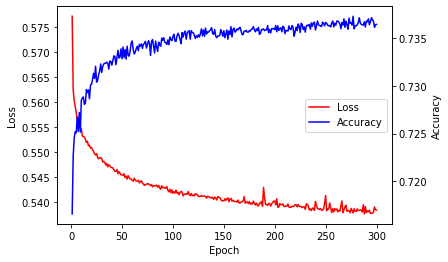

In [39]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [37]:
nn.save("AlphabetSoupCharityOptimization.h5")